In [288]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [289]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [290]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [291]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [292]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [293]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [294]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [327]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=529819963c28d200151b4d0648f81ded


In [296]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | amot
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | lima duarte
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | walvis bay
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | egvekinot
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | tiksi
Proces

Processing Record 42 of Set 4 | marsh harbour
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | ust-kuyga
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | solhan
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | berlevag
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | safranbolu
Processing Record 3 of Set 5 | igbaras
Processing Record 4 of Set 5 | buala
Processing Record 5 of Set 5 | veydelevka
Processing Record 6 of Set 5 | tosham
Processing Record 7 of Set 5 | bundaberg
Processing Record 8 of Set 5 | port lincoln
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | hasaki
Processing Record 11 of Set 5 | karratha
Processing Record 12 of Set 5 | severo-kurilsk
Processing Record 13 of Set 5 | singaparna
Processing Record 14 of Set 5 | usogorsk
Process

Processing Record 31 of Set 8 | waterloo
Processing Record 32 of Set 8 | sorvag
City not found. Skipping...
Processing Record 33 of Set 8 | kahului
Processing Record 34 of Set 8 | honningsvag
Processing Record 35 of Set 8 | kahta
Processing Record 36 of Set 8 | meulaboh
Processing Record 37 of Set 8 | vaitape
Processing Record 38 of Set 8 | tanshui
City not found. Skipping...
Processing Record 39 of Set 8 | sonoita
Processing Record 40 of Set 8 | asyut
Processing Record 41 of Set 8 | kuche
City not found. Skipping...
Processing Record 42 of Set 8 | zhangjiakou
Processing Record 43 of Set 8 | grand gaube
Processing Record 44 of Set 8 | kalevala
Processing Record 45 of Set 8 | harpenden
Processing Record 46 of Set 8 | abu dhabi
Processing Record 47 of Set 8 | papasquiaro
City not found. Skipping...
Processing Record 48 of Set 8 | balkanabat
Processing Record 49 of Set 8 | adwa
Processing Record 50 of Set 8 | san quintin
Processing Record 1 of Set 9 | inhambane
Processing Record 2 of Set 

City not found. Skipping...
Processing Record 17 of Set 12 | dabat
Processing Record 18 of Set 12 | makat
Processing Record 19 of Set 12 | mokhsogollokh
Processing Record 20 of Set 12 | korablino
Processing Record 21 of Set 12 | bull savanna
Processing Record 22 of Set 12 | fortuna
Processing Record 23 of Set 12 | sechura
Processing Record 24 of Set 12 | tiznit
Processing Record 25 of Set 12 | puli
Processing Record 26 of Set 12 | awbari
Processing Record 27 of Set 12 | grindavik
Processing Record 28 of Set 12 | cap malheureux
Processing Record 29 of Set 12 | skjervoy
Processing Record 30 of Set 12 | griffith
Processing Record 31 of Set 12 | macedo de cavaleiros
Processing Record 32 of Set 12 | esil
Processing Record 33 of Set 12 | baykit
Processing Record 34 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 12 | sergeyevka
Processing Record 36 of Set 12 | hualmay
Processing Record 37 of Set 12 | warqla
City not found. Skipping...
Processing Record 38 of Set 

In [297]:
len(city_data)

544

In [298]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.20,68,94,12.06,PF,2021-05-30 23:06:27
1,Upernavik,72.7868,-56.1549,31.69,93,100,4.94,GL,2021-05-30 23:06:27
2,Nikolskoye,59.7035,30.7861,39.09,67,10,2.53,RU,2021-05-30 23:06:27
3,Busselton,-33.6500,115.3333,51.08,67,92,13.31,AU,2021-05-30 23:06:28
4,Bethel,41.3712,-73.4140,50.20,91,100,10.74,US,2021-05-30 23:04:58
5,East London,-33.0153,27.9116,56.80,64,85,8.77,ZA,2021-05-30 23:02:04
6,Mount Gambier,-37.8333,140.7667,41.72,57,48,8.21,AU,2021-05-30 23:04:52
7,Kodiak,57.7900,-152.4072,46.80,82,100,7.27,US,2021-05-30 23:04:31
8,Amot,59.5714,7.9877,50.50,53,65,3.85,NO,2021-05-30 23:06:28
9,Chuy,-33.6971,-53.4616,44.76,72,4,6.82,UY,2021-05-30 23:06:29


In [299]:
# Reorder the columns
city_data_new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-05-30 23:06:27,-23.1203,-134.9692,75.20,68,94,12.06
1,Upernavik,GL,2021-05-30 23:06:27,72.7868,-56.1549,31.69,93,100,4.94
2,Nikolskoye,RU,2021-05-30 23:06:27,59.7035,30.7861,39.09,67,10,2.53
3,Busselton,AU,2021-05-30 23:06:28,-33.6500,115.3333,51.08,67,92,13.31
4,Bethel,US,2021-05-30 23:04:58,41.3712,-73.4140,50.20,91,100,10.74
5,East London,ZA,2021-05-30 23:02:04,-33.0153,27.9116,56.80,64,85,8.77
6,Mount Gambier,AU,2021-05-30 23:04:52,-37.8333,140.7667,41.72,57,48,8.21
7,Kodiak,US,2021-05-30 23:04:31,57.7900,-152.4072,46.80,82,100,7.27
8,Amot,NO,2021-05-30 23:06:28,59.5714,7.9877,50.50,53,65,3.85
9,Chuy,UY,2021-05-30 23:06:29,-33.6971,-53.4616,44.76,72,4,6.82


In [300]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [301]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

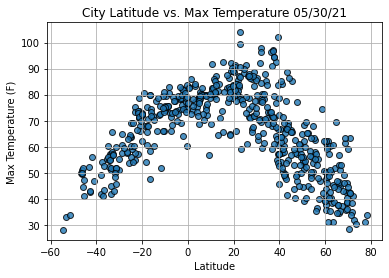

In [302]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

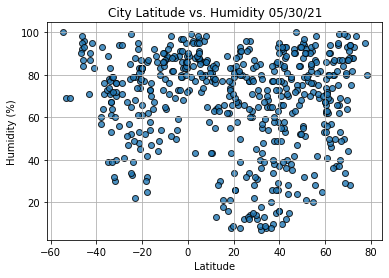

In [303]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

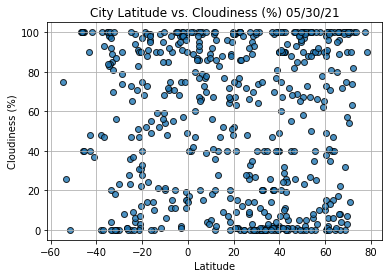

In [304]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

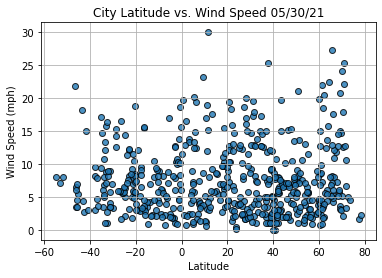

In [305]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [306]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [307]:
index13 = city_data_df.loc[13]
index13

City                   Walvis Bay
Country                        NA
Date          2021-05-30 23:06:30
Lat                      -22.9575
Lng                       14.5053
Max Temp                    55.09
Humidity                       79
Cloudiness                      4
Wind Speed                   8.12
Name: 13, dtype: object

In [308]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Upernavik,GL,2021-05-30 23:06:27,72.7868,-56.1549,31.69,93,100,4.94
2,Nikolskoye,RU,2021-05-30 23:06:27,59.7035,30.7861,39.09,67,10,2.53
4,Bethel,US,2021-05-30 23:04:58,41.3712,-73.4140,50.20,91,100,10.74
7,Kodiak,US,2021-05-30 23:04:31,57.7900,-152.4072,46.80,82,100,7.27
8,Amot,NO,2021-05-30 23:06:28,59.5714,7.9877,50.50,53,65,3.85


In [309]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

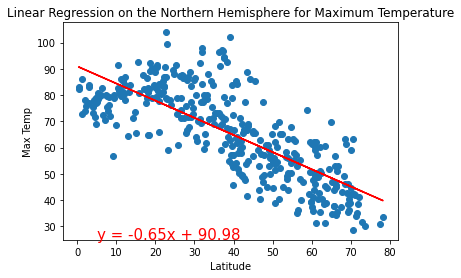

In [310]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,25))

In [311]:
linregress(x_values, y_values)

LinregressResult(slope=-0.6548207859362354, intercept=90.98377940529593, rvalue=-0.767863124369715, pvalue=3.891887858927248e-74, stderr=0.028286591271033775)

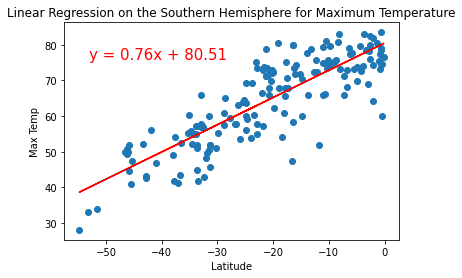

In [312]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-53,76))

In [313]:
linregress(x_values, y_values)

LinregressResult(slope=0.7640722559639723, intercept=80.50885713499183, rvalue=0.8438563532525524, pvalue=5.13005844519537e-47, stderr=0.03759528413572112)

In [314]:
linregress(x_values, y_values).rvalue

0.8438563532525524

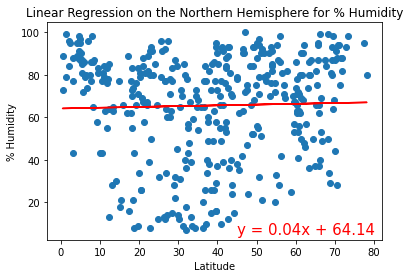

In [315]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Humidity', '% Humidity',(45,5))

In [316]:
linregress(x_values, y_values).rvalue

0.029662763973728818

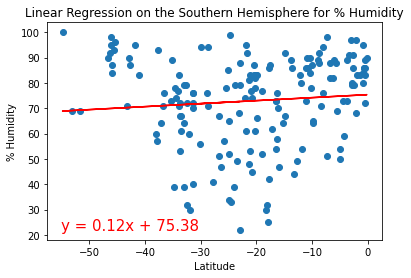

In [317]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-55,22))

In [318]:
linregress(x_values, y_values).rvalue

0.09020980734338353

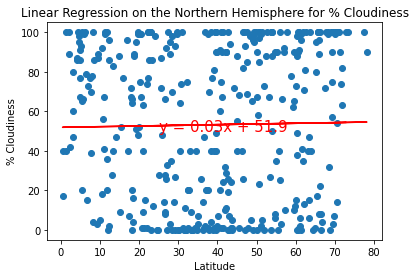

In [319]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(25,50))

In [320]:
linregress(x_values, y_values).rvalue

0.01744544684027206

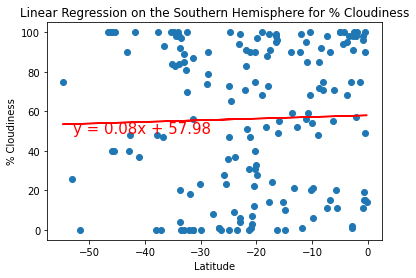

In [321]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-53,49))

In [322]:
linregress(x_values, y_values).rvalue

0.029928171167840217

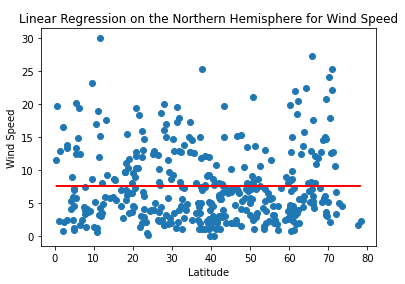

In [323]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Wind Speed', 'Wind Speed',(20,33))

In [324]:
linregress(x_values, y_values).rvalue

0.0004544705352322468

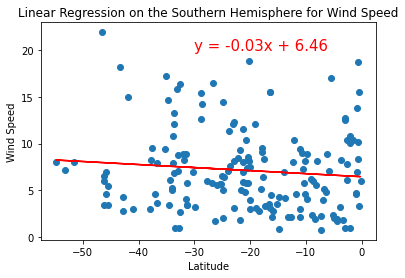

In [325]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Wind Speed', 'Wind Speed',(-30,20))

In [326]:
linregress(x_values, y_values).rvalue

-0.10081676915033314